# Analysis

While the MD simulation is running, we can take a look at our relaxation simulations. 

# 1. Import libraries needed for analysis and plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# 2. Define cumulative average function


In [2]:
def cumulative_average(data, n, window=10):
    """
    Function to calculate the cumulative average.

    Parameters
    ----------
    data: list
        list of data 
    n: int
        total number of data points

    window: int
        size of the running average window
    """
    S_i = 0
    cumulative_sum = []
    for i in range(n):
        S_i = S_i + data[i]
        cumulative_sum.append(S_i)
    cumulative_sum = np.array(cumulative_sum)    
    running_avg = (cumulative_sum[window:] - cumulative_sum[:-window]) / float(window)
    return running_avg

# 3. Plot temperature in NVT simulation

First, load in the `temperature.log` file:

In [3]:
data = np.loadtxt("output/temperature.log", delimiter=",")

Then, split the data from the two columns into two variables:

In [4]:
time = data[:,0] * 0.004 # convert steps into time 
temperature = data[:,1]

Calculate the cumulative average: 

In [5]:
avg_temperature = cumulative_average(temperature, n=len(temperature))

Finally, plot the temperature, and the cumulative average, against time: 

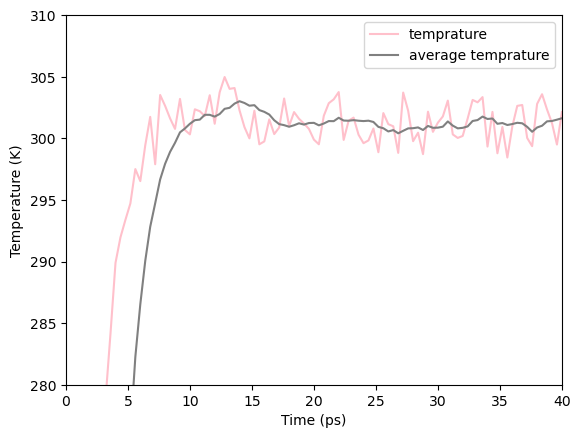

In [11]:
plt.plot(time, temperature, c="pink", label="temprature")
plt.plot(time[10:], avg_temperature, c="grey", label="average temprature")
plt.xlim(0, 40)
plt.ylim(280, 310)
plt.xlabel("Time (ps)")
plt.ylabel("Temperature (K)")
plt.legend()
plt.savefig("plots/kpc2_nvt.png")
plt.show()

# 4. Plot density from NPT simulation

In [12]:
data = np.loadtxt("results/output/density.log", delimiter=",")
time = data[:,0] * 0.004 # convert steps into time 
density = data[:,1]

In [13]:
avg_density = cumulative_average(density, n=len(density))

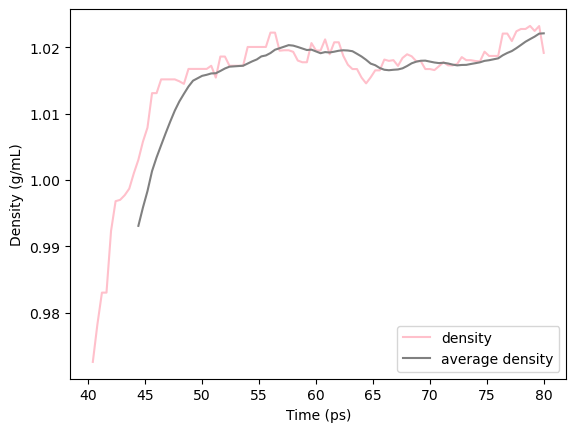

In [17]:
plt.plot(time, density, c="pink", label="density")
plt.plot(time[10:], avg_density, c="grey", label="average density")
# plt.xlim(0, 100)
# plt.ylim(250, 350)
plt.xlabel("Time (ps)")
plt.ylabel("Density (g/mL)")
plt.legend()
plt.savefig("plots/kpc2_npt.png")
plt.show()